### **Load Environment variables from .env file**

In [1]:
from openai import AzureOpenAI
from dotenv import load_dotenv
import os
from IPython.display import display, HTML, JSON, Markdown, Image

load_dotenv()
GPT4o_API_KEY = os.getenv("GPT4o_API_KEY")
GPT4o_DEPLOYMENT_ENDPOINT = os.getenv("GPT4o_DEPLOYMENT_ENDPOINT")
GPT4o_DEPLOYMENT_NAME = os.getenv("GPT4o_DEPLOYMENT_NAME")


client = AzureOpenAI(
  azure_endpoint = GPT4o_DEPLOYMENT_ENDPOINT, 
  api_key=GPT4o_API_KEY,  
  api_version="2024-02-01"
)

In [2]:
def call_openAI(text):
    response = client.chat.completions.create(
        model=GPT4o_DEPLOYMENT_NAME,
        messages = text,
        temperature=0.0
    )
    return response.choices[0].message.content

### **Text input + Text output**

In [3]:
# prepare prompt with another question:
messages = [{"role": "system", "content": "You are a HELPFUL assistant answering users trivia questions. Answer in clear and concise manner."},
            {"role": "user", "content": "What's string theory?"}]

result = call_openAI(messages)
display(HTML(result))

### **Image input + Text output**  
Measure floorplan

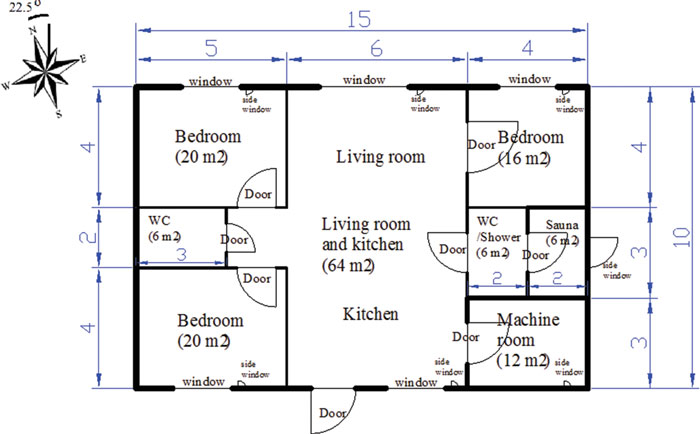

In [4]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

IMAGE_PATH = "./data/floorplan1.png"
base64_image = encode_image(IMAGE_PATH)
# Preview image for context
display(Image(IMAGE_PATH))

In [7]:

messages=[
    {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my architecture homework!"},
    {"role": "user", "content": [
        {"type": "text", "text": "What's the area of this house floorplan?"},
        {"type": "image_url", "image_url": {
            "url": f"data:image/png;base64,{base64_image}"}
        }
    ]}
]

result = call_openAI(messages)
display(HTML(result))

#### Let's ask GPT4o to measure a floorplan without calculated areas

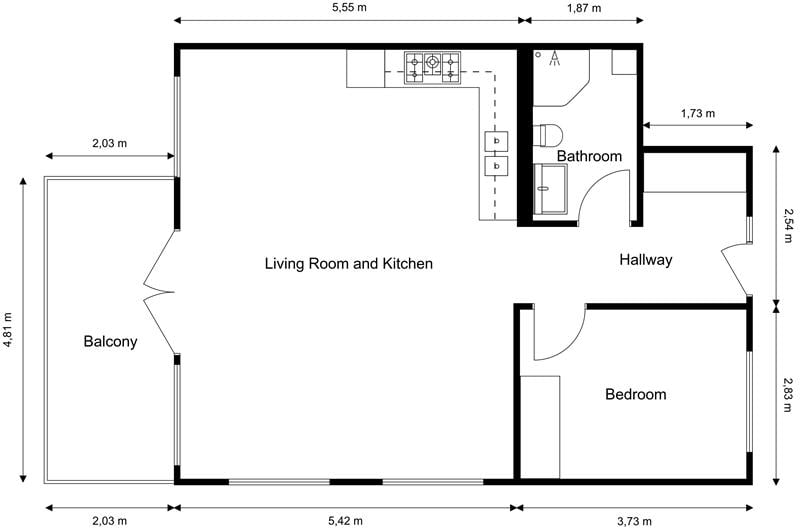

In [8]:
IMAGE_PATH = "./data/floorplan2.jpg"
base64_image = encode_image(IMAGE_PATH)
# Preview image for context
display(Image(IMAGE_PATH))

In [9]:
messages=[
    {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my architecture homework!"},
    {"role": "user", "content": [
        {"type": "text", "text": "What's the area of this house floorplan?"},
        {"type": "image_url", "image_url": {
            "url": f"data:image/png;base64,{base64_image}"}
        }
    ]}
]

result = call_openAI(messages)
display(HTML(result))

#### Interpret an organizational chart

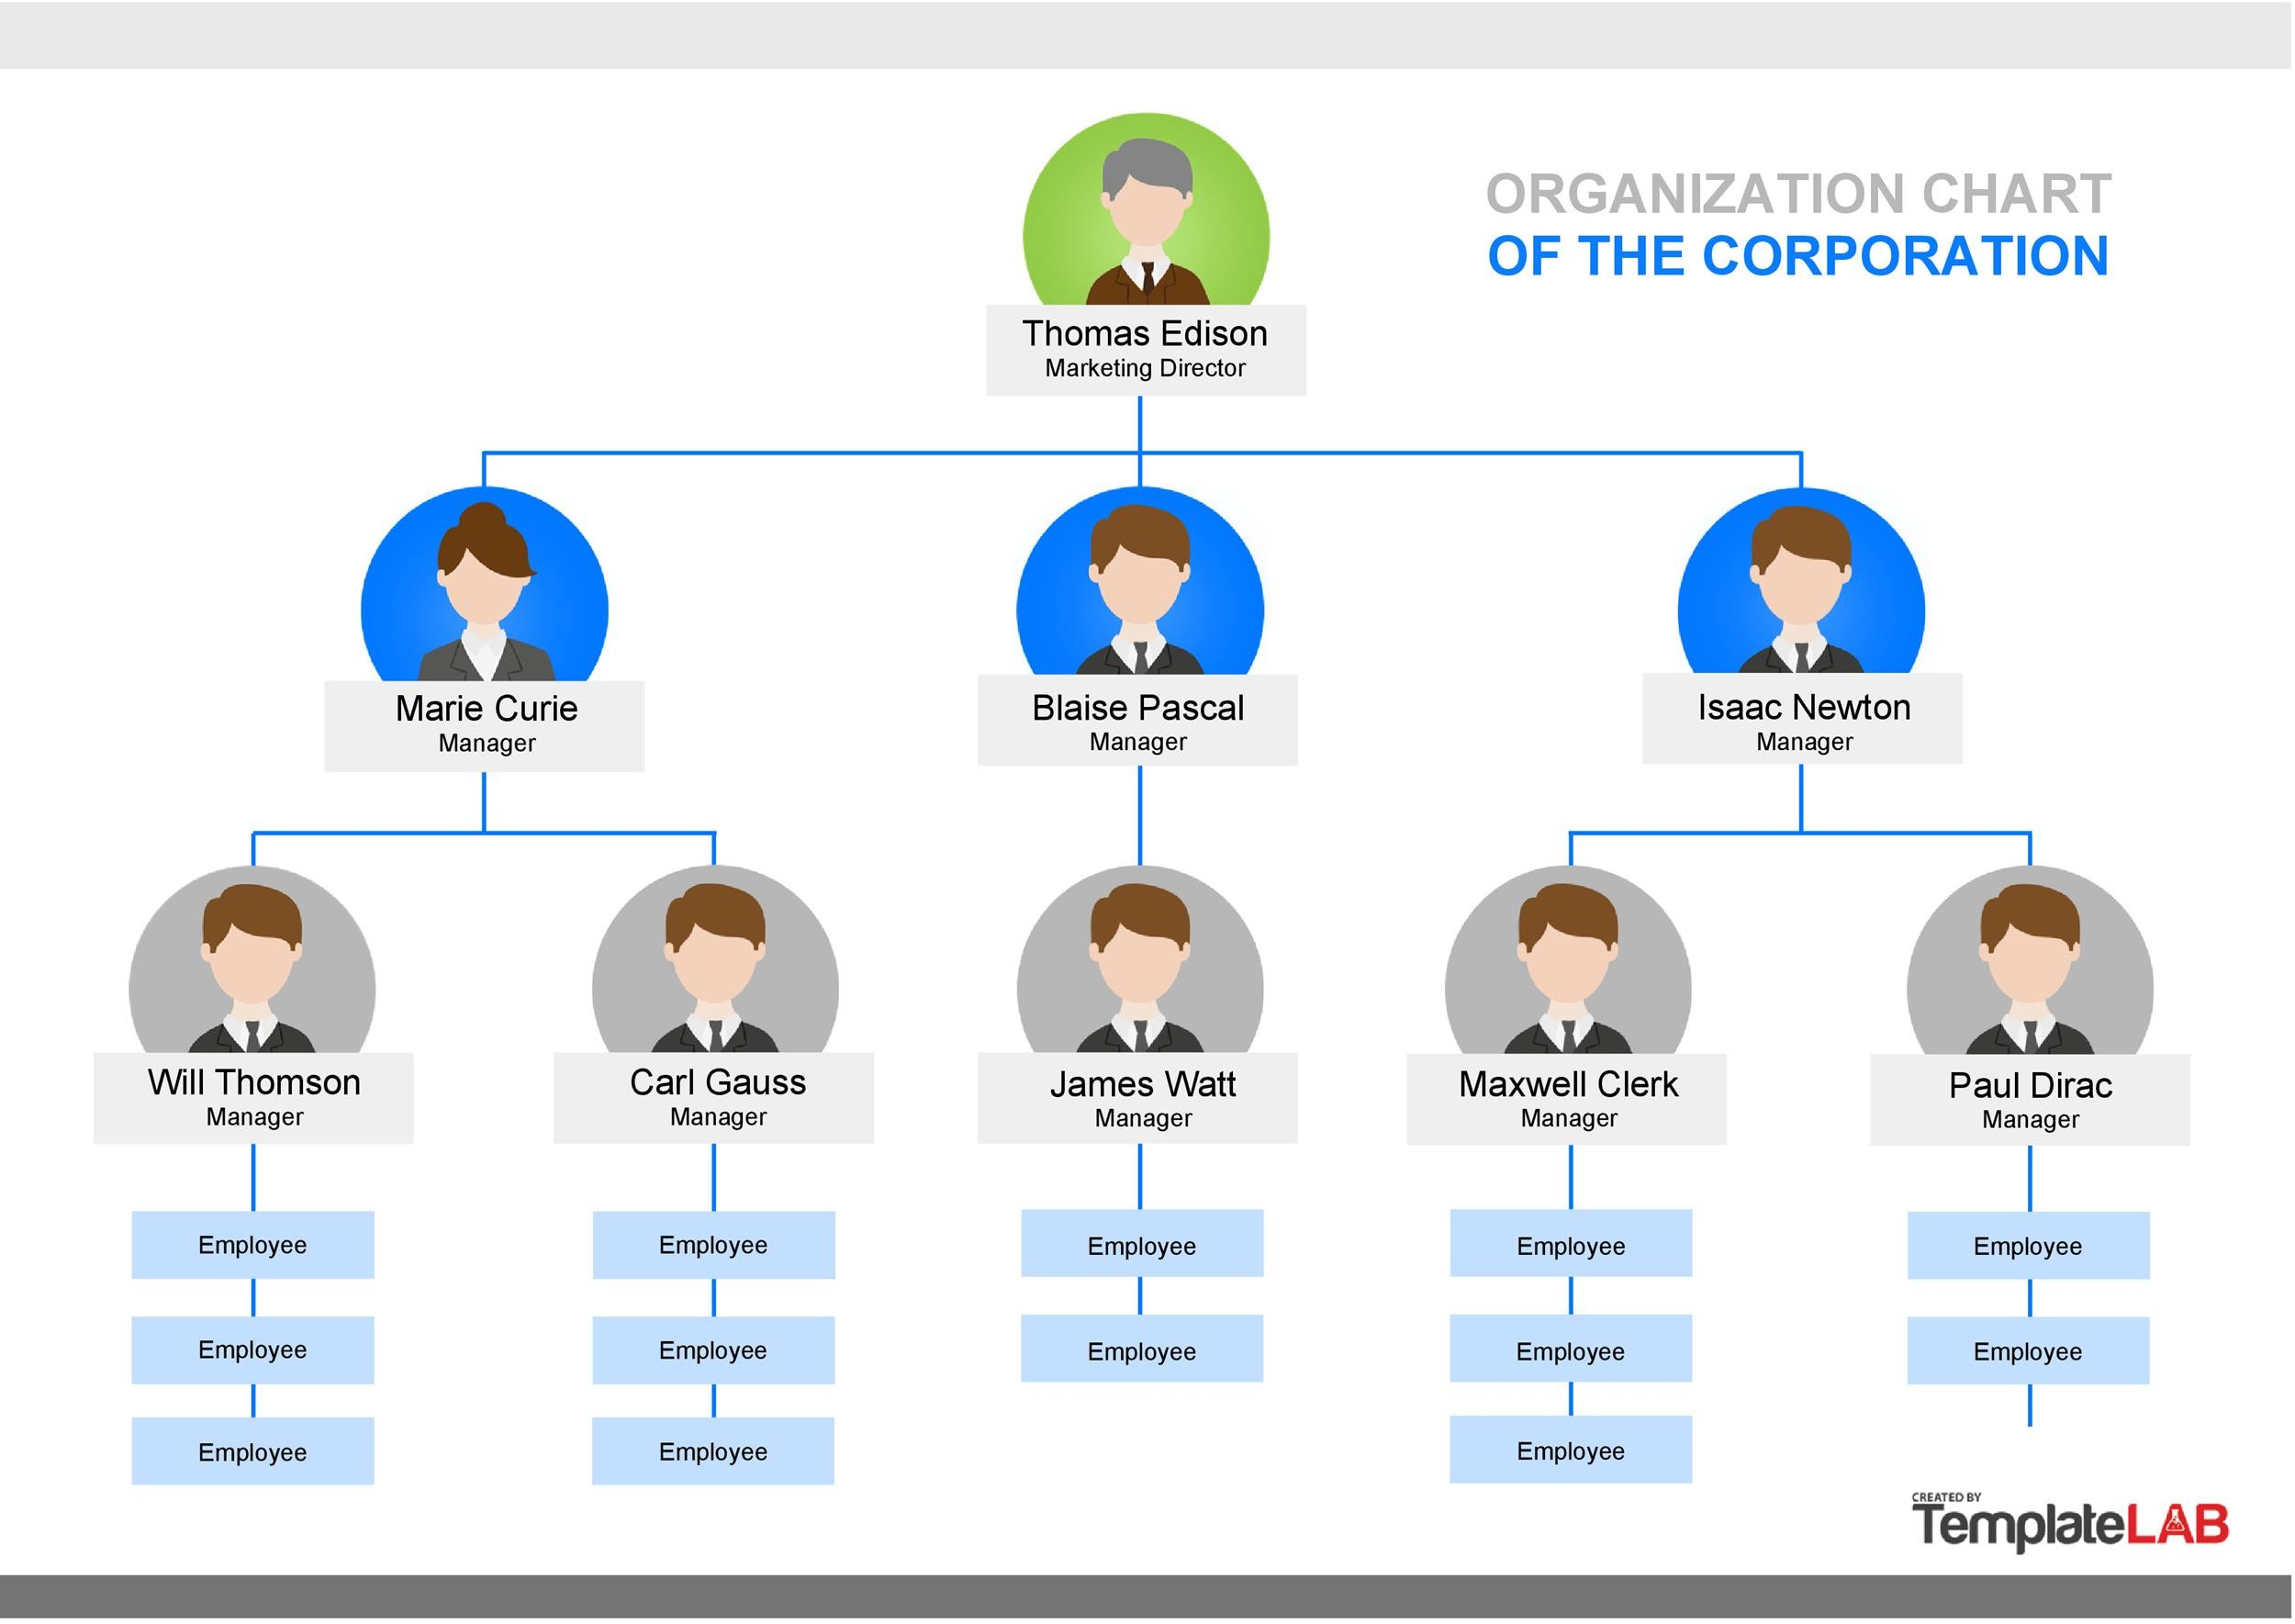

In [10]:
IMAGE_PATH = "./data/orgchart.jpg"
base64_image = encode_image(IMAGE_PATH)
# Preview image for context
display(Image(IMAGE_PATH))

In [12]:
messages=[
    {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with this organizational chart"},
    {"role": "user", "content": [
        {"type": "text", "text": "How many direct and indirect reports Marie curie has?"},
        {"type": "image_url", "image_url": {
            "url": f"data:image/png;base64,{base64_image}"}
        }
    ]}
]

result = call_openAI(messages)
display(HTML(result))

#### Now analyze a graph

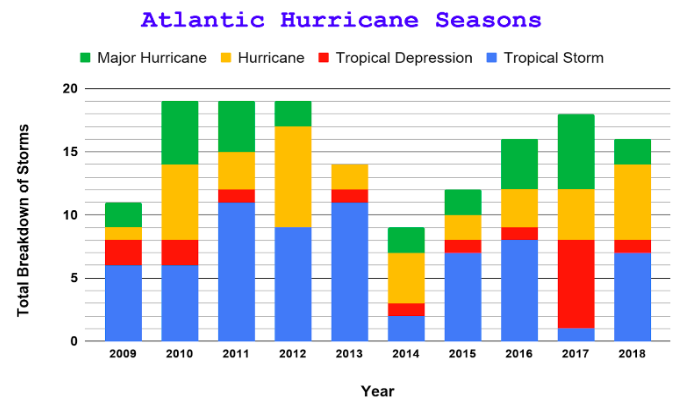

In [13]:
IMAGE_PATH = "./data/storm2.png"
base64_image = encode_image(IMAGE_PATH)
# Preview image for context
display(Image(IMAGE_PATH))

In [14]:
messages=[
    {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with this graph"},
    {"role": "user", "content": [
        {"type": "text", "text": "Which year had less Major Hurricanes?"},
        {"type": "image_url", "image_url": {
            "url": f"data:image/png;base64,{base64_image}"}
        }
    ]}
]

result = call_openAI(messages)
display(HTML(result))